# 3 - 

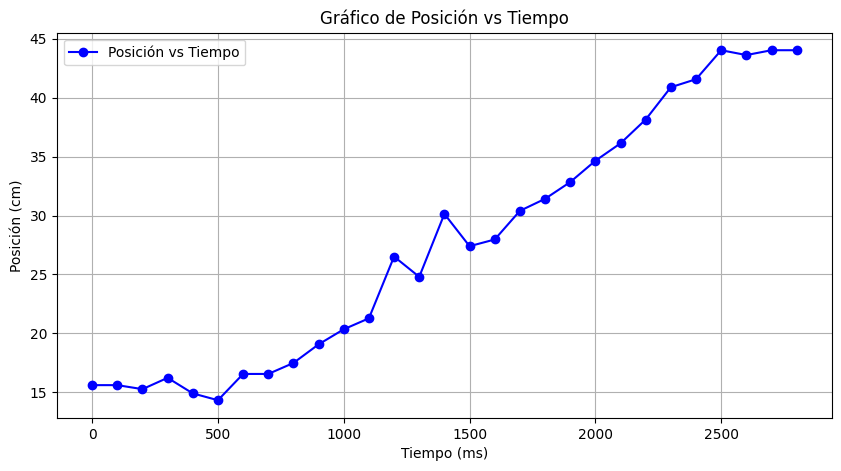

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados en formato de diccionario para crear el DataFrame
data = {
    "Tiempo": [
        0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800
    ],
    "Posición": [
        15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
        26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
        41.57, 44.03, 43.62, 44.03, 44.03
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Crear gráfico de distancia vs tiempo
plt.figure(figsize=(10, 5))
plt.plot(df["Tiempo"], df["Posición"], marker='o', linestyle='-', color='b', label='Posición vs Tiempo')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Posición (cm)")
plt.title("Gráfico de Posición vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()


# 4 -

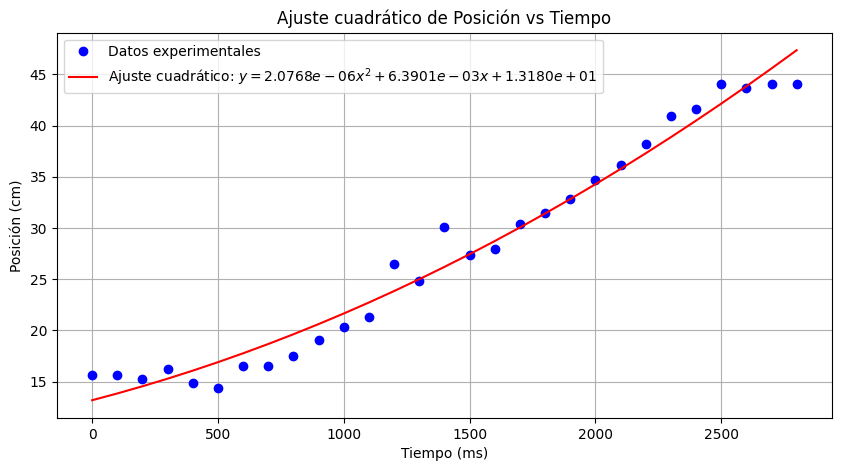

(4.153609936934552e-06,
 1.054208158038686e-06,
 array([2.07680497e-06, 6.39006926e-03, 1.31799467e+01]),
 array([5.27104079e-07, 1.52751087e-03, 9.23843683e-01]))

In [3]:

import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

# Datos proporcionados en formato de diccionario para crear el DataFrame
data = {
    "Tiempo": [
        0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 
        1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800
    ],
    "Posición": [
        15.61, 15.61, 15.27, 16.23, 14.91, 14.33, 16.56, 16.56, 17.49, 19.07, 20.35, 21.28, 
        26.52, 24.8, 30.14, 27.4, 27.97, 30.4, 31.42, 32.84, 34.65, 36.13, 38.15, 40.89, 
        41.57, 44.03, 43.62, 44.03, 44.03
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Definir la función cuadrática
def quadratic(x, a, b, c):
    return a * x**2 + b * x + c

# Realizar el ajuste cuadrático
x_data = df["Tiempo"]
y_data = df["Posición"]

# Ajustar los datos a un polinomio de segundo grado
params, covariance = curve_fit(quadratic, x_data, y_data)

# Coeficientes del polinomio
a, b, c = params

# Incertezas de los coeficientes (diagonales de la matriz de covarianza)
incertezas = np.sqrt(np.diag(covariance))

# Calcular la aceleración promedio (2 veces el coeficiente a)
aceleracion = 2 * a
incerteza_aceleracion = 2 * incertezas[0]

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(x_data, y_data, 'bo', label='Datos experimentales')
plt.plot(x_data, quadratic(x_data, *params), 'r-', label=f'Ajuste cuadrático: $y = {a:.4e}x^2 + {b:.4e}x + {c:.4e}$')
plt.xlabel("Tiempo (ms)")
plt.ylabel("Posición (cm)")
plt.title("Ajuste cuadrático de Posición vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los resultados
(aceleracion, incerteza_aceleracion, params, incertezas)


# 5 - 

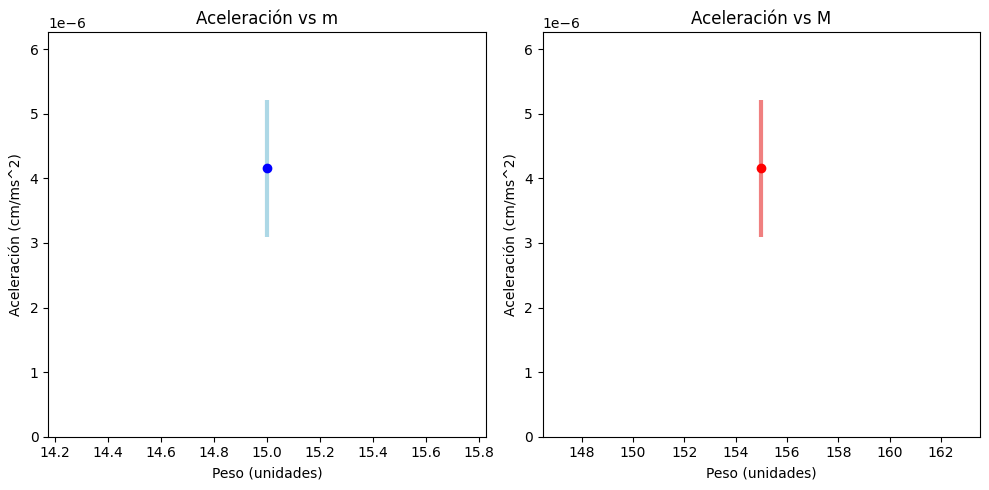

In [4]:
import matplotlib.pyplot as plt

# Pesos de los objetos
m = 15  # pelotita plateada
M = 155  # trineo

# Aceleración calculada y su incerteza
aceleracion = 4.153609936934552e-06
incerteza_aceleracion = 1.0542081580386782e-06

# Crear gráficos
plt.figure(figsize=(10, 5))

# Gráfico de Aceleración vs m
plt.subplot(1, 2, 1)
plt.errorbar(m, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='blue', ecolor='lightblue', elinewidth=3, capsize=0)
plt.title("Aceleración vs m")
plt.xlabel("Peso (unidades)")
plt.ylabel("Aceleración (cm/ms^2)")
plt.ylim(0, aceleracion + incerteza_aceleracion*2)

# Gráfico de Aceleración vs M
plt.subplot(1, 2, 2)
plt.errorbar(M, aceleracion, yerr=incerteza_aceleracion, fmt='o', color='red', ecolor='lightcoral', elinewidth=3, capsize=0)
plt.title("Aceleración vs M")
plt.xlabel("Peso (unidades)")
plt.ylabel("Aceleración (cm/ms^2)")
plt.ylim(0, aceleracion + incerteza_aceleracion*2)

plt.tight_layout()
plt.show()

# 6 - 

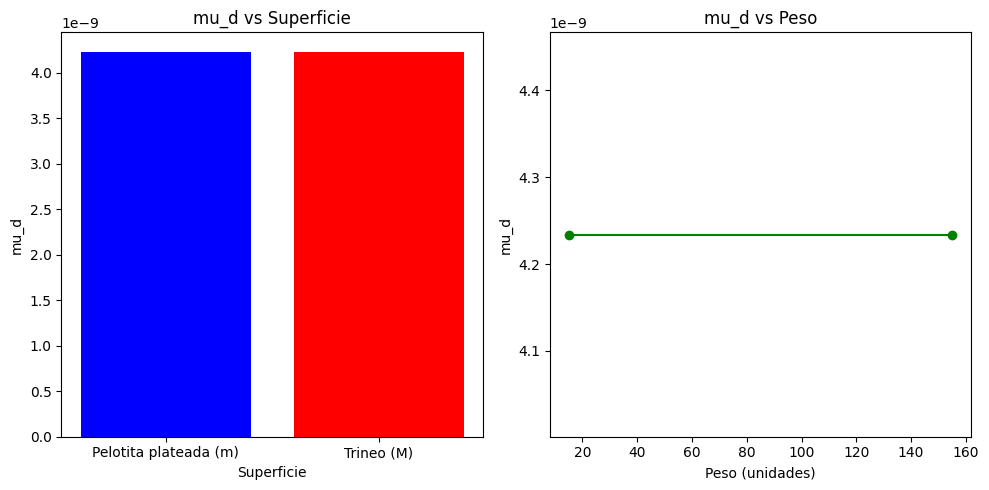

In [5]:

import matplotlib.pyplot as plt

# Coeficientes de rozamiento calculados
mu_d_m = 4.234057020320644e-09
mu_d_M = 4.234057020320644e-09

# Pesos y superficies
pesos = [m, M]
mu_d_values = [mu_d_m, mu_d_M]
superficies = ["Pelotita plateada (m)", "Trineo (M)"]

# Crear gráfico de mu_d vs superficie
plt.figure(figsize=(10, 5))

# Gráfico de mu_d vs superficie
plt.subplot(1, 2, 1)
plt.bar(superficies, mu_d_values, color=['blue', 'red'])
plt.title("mu_d vs Superficie")
plt.xlabel("Superficie")
plt.ylabel("mu_d")

# Gráfico de mu_d vs peso
plt.subplot(1, 2, 2)
plt.plot(pesos, mu_d_values, 'o-', color='green')
plt.title("mu_d vs Peso")
plt.xlabel("Peso (unidades)")
plt.ylabel("mu_d")

plt.tight_layout()
plt.show()
